In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
df = pd.read_csv("titanic.csv")
df.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [4]:
# Creating a new column family in the dataset by adding SibSp column and Parch column
df['Family'] = df['SibSp'] + df['Parch']
df.head(2)

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,Family
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S,1
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C,1


In [5]:
# Ticket--> As it is just  random number,we can skip this column from our analysis

In [6]:
df.Family.describe()

count    891.000000
mean       0.904602
std        1.613459
min        0.000000
25%        0.000000
50%        0.000000
75%        1.000000
max       10.000000
Name: Family, dtype: float64

In [7]:
df.Fare.describe()

count    891.000000
mean      32.204208
std       49.693429
min        0.000000
25%        7.910400
50%       14.454200
75%       31.000000
max      512.329200
Name: Fare, dtype: float64

In [8]:
#Based on the categories, we will analyze which category people were more likely to survive
## Low, Mid, Mid-High, High
df['Fare_Category'] = pd.cut(df.Fare, bins = [0, 7.9, 14.45, 31.00, 512], 
                            labels = ['Low', 'Mid', 'Mid-High', 'High'])
df['Fare_Category'].head()

0     Low
1    High
2     Mid
3    High
4     Mid
Name: Fare_Category, dtype: category
Categories (4, object): [Low < Mid < Mid-High < High]

In [9]:
df[['Fare', 'Fare_Category']]

,Fare,Fare_Category
0,7.2500,Low
1,71.2833,High
2,7.9250,Mid
3,53.1000,High
4,8.0500,Mid
5,8.4583,Mid
6,51.8625,High
7,21.0750,Mid-High
8,11.1333,Mid
9,30.0708,Mid-High


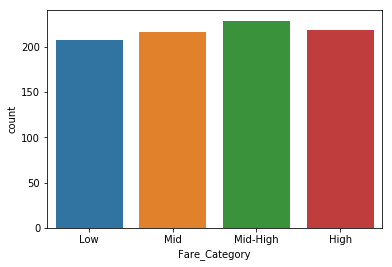

In [10]:
## Visualize the Fare Category
## Countplot give you entire count of a category--> categories of Survived and Deceased
sns.countplot(x = 'Fare_Category', data = df)

Text(0.5,1,'Survival based on Fare Category')

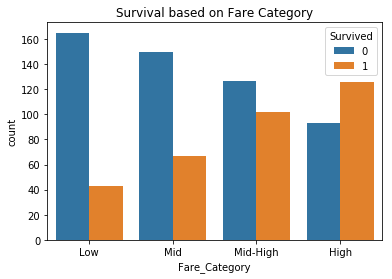

In [13]:
## Visualizing the count of categories based on Survived
sns.countplot(x = 'Fare_Category', hue = 'Survived', data = df).\
              set_title('Survival based on Fare Category')

In [14]:
## Emaberked : Port--> from which the passenger had boarded the ship
df.Embarked.value_counts()# Out of 100% passengers,which port has taken more %

S    644
C    168
Q     77
Name: Embarked, dtype: int64

In [17]:
df.Embarked.value_counts(normalize=True)

S    0.724409
C    0.188976
Q    0.086614
Name: Embarked, dtype: float64

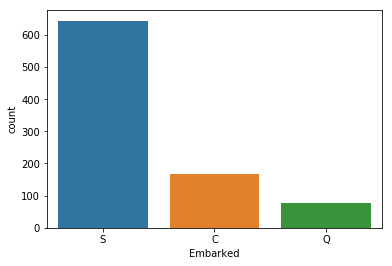

In [18]:
## Visualizing the port column
sns.countplot(x = 'Embarked', data=df)

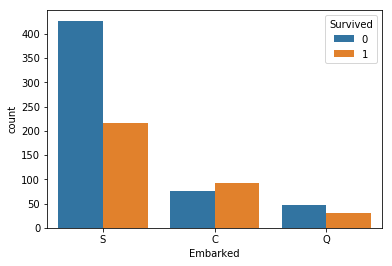

In [19]:
sns.countplot(x = 'Embarked', hue='Survived', data=df)

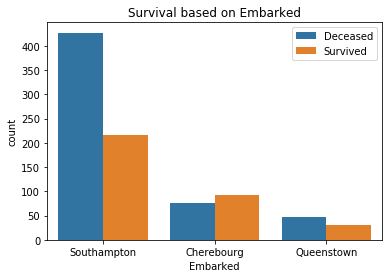

In [20]:
## Visualizing the port column
p = sns.countplot(x = 'Embarked', hue='Survived', data = df)
p.set_xticklabels(['Southampton', 'Cherebourg', 'Queenstown'])
p.set_title('Survival based on Embarked')
p.legend(labels=['Deceased', 'Survived'])

In [21]:
## Imputing with missing values
df.isnull().mean().sort_values(ascending=False)

Cabin            0.771044
Age              0.198653
Fare_Category    0.020202
Embarked         0.002245
Family           0.000000
Fare             0.000000
Ticket           0.000000
Parch            0.000000
SibSp            0.000000
Sex              0.000000
Name             0.000000
Pclass           0.000000
Survived         0.000000
PassengerId      0.000000
dtype: float64

In [22]:
df.Cabin.head()

0     NaN
1     C85
2     NaN
3    C123
4     NaN
Name: Cabin, dtype: object

In [27]:
## Cabin-> 77% mmissing values, we are going to create a new category as NA
df.Cabin.fillna('NA',inplace=True)

In [28]:
df.Cabin.isnull().sum()

0

In [29]:
df.Age.head()

0    22.0
1    38.0
2    26.0
3    35.0
4    35.0
Name: Age, dtype: float64

In [30]:
df.Age.describe()

count    714.000000
mean      29.699118
std       14.526497
min        0.420000
25%       20.125000
50%       28.000000
75%       38.000000
max       80.000000
Name: Age, dtype: float64

### Imputing Age column

In [31]:
#  Median--> sorting in the order(middle value) NaN in the age column should be substituted with median of age
df.Age.fillna(df.Age.median(), inplace=True)
df.Age.isnull().sum()

0

### Imputing the Embarked Column

In [32]:
## imputing the embarked column--> Mode Imputation
df.Embarked.fillna(df.Embarked.mode()[0], inplace=True)
df.Embarked.isnull().sum()

0

In [34]:
#Imputing the Fare Category column
df.Fare_Category.isnull().sum()

18

In [35]:
df.Fare_Category.fillna(df.Fare_Category.mode()[0], inplace=True)
df.Fare_Category.isnull().sum()

0

In [36]:
df.isnull().sum()

PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age              0
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin            0
Embarked         0
Family           0
Fare_Category    0
dtype: int64

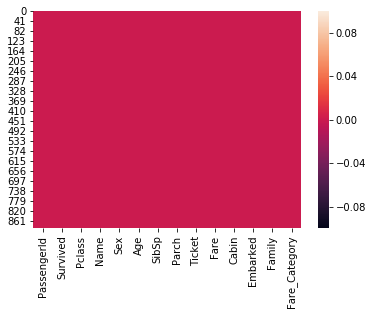

In [37]:
sns.heatmap(df.isnull())

In [38]:
df.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,Family,Fare_Category
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NA,S,1,Low
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C,1,High
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NA,S,0,Mid
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S,1,High
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NA,S,0,Mid


In [40]:
df['Age-Range'] = pd.cut(df.Age, [0, 10, 20, 30, 40, 60, 80])
df[['Age', 'Age-Range']].head()

,Age,Age-Range
0,22.0,"(20, 30]"
1,38.0,"(30, 40]"
2,26.0,"(20, 30]"
3,35.0,"(30, 40]"
4,35.0,"(30, 40]"


In [41]:
df.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,Family,Fare_Category,Age-Range
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NA,S,1,Low,"(20, 30]"
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C,1,High,"(30, 40]"
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NA,S,0,Mid,"(20, 30]"
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S,1,High,"(30, 40]"
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NA,S,0,Mid,"(30, 40]"


In [42]:
pd.get_dummies(df.Fare_Category,drop_first=True)# n columns, we need to incluse upto n-1 dummy columns

,Mid,Mid-High,High
0,0,0,0
1,0,0,1
2,1,0,0
3,0,0,1
4,1,0,0
5,1,0,0
6,0,0,1
7,0,1,0
8,1,0,0
9,0,1,0


In [44]:
# when we are creating dummy columns, we need to drop one dummy column-->it leads to a situation called as Dummy variable Trap
dummy_set = pd.get_dummies(df.Fare_Category,drop_first=True)
dummy_set

,Mid,Mid-High,High
0,0,0,0
1,0,0,1
2,1,0,0
3,0,0,1
4,1,0,0
5,1,0,0
6,0,0,1
7,0,1,0
8,1,0,0
9,0,1,0


In [ ]:
#df = pd.concat([df,[dummy_set],axis=1])

In [47]:
## Encoding of Categorical Variables/Columns
df = pd.concat([df, pd.get_dummies(df.Cabin,prefix='Cabin', drop_first=True),
               pd.get_dummies(df.Embarked, prefix='Emb', drop_first=True),
               pd.get_dummies(df.Fare_Category, prefix='Fare', drop_first=True),
               pd.get_dummies(df['Age-Range'],drop_first=True)], axis=1)
df.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,...,Emb_Q,Emb_S,Fare_Mid,Fare_Mid-High,Fare_High,"(10, 20]","(20, 30]","(30, 40]","(40, 60]","(60, 80]"
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,...,0,1,0,0,0,0,1,0,0,0
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,...,0,0,0,0,1,0,0,1,0,0
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,...,0,1,1,0,0,0,1,0,0,0
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,...,0,1,0,0,1,0,0,1,0,0
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,...,0,1,1,0,0,0,0,1,0,0


In [49]:
# Encoding the Sex Column
from sklearn.preprocessing import LabelEncoder
df['Sex'] = LabelEncoder().fit_transform(df.Sex)
df.head(1)

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,...,Emb_Q,Emb_S,Fare_Mid,Fare_Mid-High,Fare_High,"(10, 20]","(20, 30]","(30, 40]","(40, 60]","(60, 80]"
0,1,0,3,"Braund, Mr. Owen Harris",1,22.0,1,0,A/5 21171,7.25,...,0,1,0,0,0,0,1,0,0,0


In [50]:
df.columns

Index([  'PassengerId',      'Survived',        'Pclass',          'Name',
                 'Sex',           'Age',         'SibSp',         'Parch',
              'Ticket',          'Fare',
       ...
               'Emb_Q',         'Emb_S',      'Fare_Mid', 'Fare_Mid-High',
           'Fare_High',        (10, 20],        (20, 30],        (30, 40],
              (40, 60],        (60, 80]],
      dtype='object', length=172)

In [51]:
# Drop the unnecessary columns
df.drop(['PassengerId', 'Name', 'Age', 'SibSp', 'Parch', 'Ticket', 'Fare', 'Embarked', 'Fare_Category', 'Cabin', 'Age-Range'],
        axis=1, inplace=True )
df.shape

(891, 161)

In [52]:
df.head()

,Survived,Pclass,Sex,Family,Cabin_A14,Cabin_A16,Cabin_A19,Cabin_A20,Cabin_A23,Cabin_A24,...,Emb_Q,Emb_S,Fare_Mid,Fare_Mid-High,Fare_High,"(10, 20]","(20, 30]","(30, 40]","(40, 60]","(60, 80]"
0,0,3,1,1,0,0,0,0,0,0,...,0,1,0,0,0,0,1,0,0,0
1,1,1,0,1,0,0,0,0,0,0,...,0,0,0,0,1,0,0,1,0,0
2,1,3,0,0,0,0,0,0,0,0,...,0,1,1,0,0,0,1,0,0,0
3,1,1,0,1,0,0,0,0,0,0,...,0,1,0,0,1,0,0,1,0,0
4,0,3,1,0,0,0,0,0,0,0,...,0,1,1,0,0,0,0,1,0,0


In [53]:
df.dtypes

Survived         int64
Pclass           int64
Sex              int64
Family           int64
Cabin_A14        uint8
Cabin_A16        uint8
Cabin_A19        uint8
Cabin_A20        uint8
Cabin_A23        uint8
Cabin_A24        uint8
Cabin_A26        uint8
Cabin_A31        uint8
Cabin_A32        uint8
Cabin_A34        uint8
Cabin_A36        uint8
Cabin_A5         uint8
Cabin_A6         uint8
Cabin_A7         uint8
Cabin_B101       uint8
Cabin_B102       uint8
Cabin_B18        uint8
Cabin_B19        uint8
Cabin_B20        uint8
Cabin_B22        uint8
Cabin_B28        uint8
Cabin_B3         uint8
Cabin_B30        uint8
Cabin_B35        uint8
Cabin_B37        uint8
Cabin_B38        uint8
                 ...  
Cabin_E44        uint8
Cabin_E46        uint8
Cabin_E49        uint8
Cabin_E50        uint8
Cabin_E58        uint8
Cabin_E63        uint8
Cabin_E67        uint8
Cabin_E68        uint8
Cabin_E77        uint8
Cabin_E8         uint8
Cabin_F E69      uint8
Cabin_F G63      uint8
Cabin_F G73

In [54]:
## StandardScaler-- not required for this(DistanceBased Algorithms)

In [55]:
## Seperating the Input and Output Data,dropping the survived column from the data
X = df.drop('Survived',axis=1)
X.shape

(891, 160)

In [56]:
df.iloc[:,:]

,Survived,Pclass,Sex,Family,Cabin_A14,Cabin_A16,Cabin_A19,Cabin_A20,Cabin_A23,Cabin_A24,...,Emb_Q,Emb_S,Fare_Mid,Fare_Mid-High,Fare_High,"(10, 20]","(20, 30]","(30, 40]","(40, 60]","(60, 80]"
0,0,3,1,1,0,0,0,0,0,0,...,0,1,0,0,0,0,1,0,0,0
1,1,1,0,1,0,0,0,0,0,0,...,0,0,0,0,1,0,0,1,0,0
2,1,3,0,0,0,0,0,0,0,0,...,0,1,1,0,0,0,1,0,0,0
3,1,1,0,1,0,0,0,0,0,0,...,0,1,0,0,1,0,0,1,0,0
4,0,3,1,0,0,0,0,0,0,0,...,0,1,1,0,0,0,0,1,0,0
5,0,3,1,0,0,0,0,0,0,0,...,1,0,1,0,0,0,1,0,0,0
6,0,1,1,0,0,0,0,0,0,0,...,0,1,0,0,1,0,0,0,1,0
7,0,3,1,4,0,0,0,0,0,0,...,0,1,0,1,0,0,0,0,0,0
8,1,3,0,2,0,0,0,0,0,0,...,0,1,1,0,0,0,1,0,0,0
9,1,2,0,1,0,0,0,0,0,0,...,0,0,0,1,0,1,0,0,0,0


In [60]:
## Output Column
y = df.iloc[:,0]
y.shape

(891,)

In [61]:
## Input and Output into training data and testing data
##Training --> we will be training the model on training data
###Testing--> check the performance of the model
## 891--> out of 891, 75% of 891 rows will be training dataset and 25% of rows will be in testing data

In [62]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.25, random_state=1)

In [63]:
print(X_train.shape)
print(X_test.shape)
print(y_train.shape)
print(y_test.shape)

(668, 160)
(223, 160)
(668,)
(223,)


In [64]:
X_train

,Pclass,Sex,Family,Cabin_A14,Cabin_A16,Cabin_A19,Cabin_A20,Cabin_A23,Cabin_A24,Cabin_A26,...,Emb_Q,Emb_S,Fare_Mid,Fare_Mid-High,Fare_High,"(10, 20]","(20, 30]","(30, 40]","(40, 60]","(60, 80]"
35,1,1,1,0,0,0,0,0,0,0,...,0,1,0,0,1,0,0,0,1,0
46,3,1,1,0,0,0,0,0,0,0,...,1,0,0,1,0,0,1,0,0,0
453,1,1,1,0,0,0,0,0,0,0,...,0,0,0,0,1,0,0,0,1,0
291,1,0,1,0,0,0,0,0,0,0,...,0,0,0,0,1,1,0,0,0,0
748,1,1,1,0,0,0,0,0,0,0,...,0,1,0,0,1,1,0,0,0,0
41,2,0,1,0,0,0,0,0,0,0,...,0,1,0,1,0,0,1,0,0,0
224,1,1,1,0,0,0,0,0,0,0,...,0,1,0,0,1,0,0,1,0,0
340,2,1,2,0,0,0,0,0,0,0,...,0,1,0,1,0,0,0,0,0,0
125,3,1,1,0,0,0,0,0,0,0,...,0,0,1,0,0,1,0,0,0,0
803,3,1,1,0,0,0,0,0,0,0,...,0,0,1,0,0,0,0,0,0,0
